In [1]:
#mengoneksikan Colab dengan Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Data COVID-19 di Indonesia
df = pd.read_csv('/content/drive/MyDrive/Google Earth/tugas_pks/covid_indonesia_2.csv')
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140
...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643


In [ ]:
#Melakukan cek typedata
df.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

In [ ]:
# Mengubah kolom Tanggal menjadi tipe data datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.dtypes

Tanggal            datetime64[ns]
Kasus_harian                int64
Total_kasus                 int64
Kasus_aktif                 int64
Sembuh_baru                 int64
Sembuh                      int64
Meninggal_baru              int64
Meninggal_Dunia             int64
dtype: object

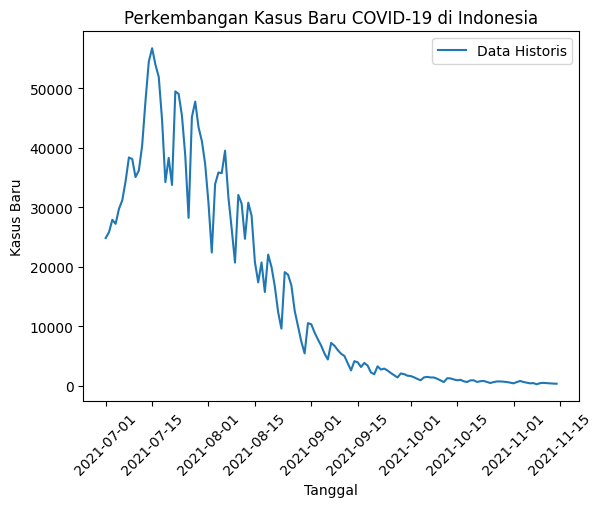

In [ ]:
plt.plot(df['Tanggal'], df['Kasus_harian'], label='Data Historis')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Baru')
plt.title('Perkembangan Kasus Baru COVID-19 di Indonesia')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
X = df['Tanggal']
y = df['Kasus_harian']

start_date = datetime(2021, 11, 15)
end_date = datetime(2021, 12, 14)

# Menghasilkan rentang tanggal prediksi
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

X = pd.RangeIndex(start=0, stop=len(df), step=1).values.reshape(-1, 1)


# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Prediksi menggunakan model yang telah dilatih
# Mengubah rentang tanggal menjadi indeks numerik
X_pred = pd.RangeIndex(start=len(df), stop=len(df)+len(date_range), step=1).values.reshape(-1, 1)

# Menggunakan model untuk melakukan prediksi
y_pred = model.predict(X_pred)

# Menampilkan hasil prediksi
prediksi_df = pd.DataFrame({'Tanggal': date_range, 'Prediksi': y_pred})

# Menampilkan hasil prediksi
print(prediksi_df)

      Tanggal      Prediksi
0  2021-11-15 -10394.080292
1  2021-11-16 -10763.970486
2  2021-11-17 -11133.860679
3  2021-11-18 -11503.750873
4  2021-11-19 -11873.641066
5  2021-11-20 -12243.531260
6  2021-11-21 -12613.421454
7  2021-11-22 -12983.311647
8  2021-11-23 -13353.201841
9  2021-11-24 -13723.092034
10 2021-11-25 -14092.982228
11 2021-11-26 -14462.872421
12 2021-11-27 -14832.762615
13 2021-11-28 -15202.652809
14 2021-11-29 -15572.543002
15 2021-11-30 -15942.433196
16 2021-12-01 -16312.323389
17 2021-12-02 -16682.213583
18 2021-12-03 -17052.103777
19 2021-12-04 -17421.993970
20 2021-12-05 -17791.884164
21 2021-12-06 -18161.774357
22 2021-12-07 -18531.664551
23 2021-12-08 -18901.554745
24 2021-12-09 -19271.444938
25 2021-12-10 -19641.335132
26 2021-12-11 -20011.225325
27 2021-12-12 -20381.115519
28 2021-12-13 -20751.005712
29 2021-12-14 -21120.895906


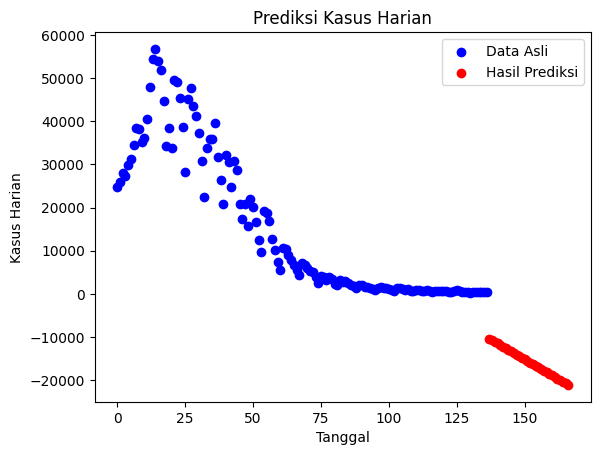

In [ ]:
# Menampilkan data asli
plt.scatter(X, y, color='blue', label='Data Asli')

# Menampilkan hasil prediksi
plt.scatter(X_pred, y_pred, color='red', label='Hasil Prediksi')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Tanggal')
plt.ylabel('Kasus Harian')

# Menambahkan judul plot
plt.title('Prediksi Kasus Harian')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()